In [3]:
import librosa
import numpy as np
from sklearn.cluster import KMeans
import  scipy
import matplotlib as plt
y,sr=librosa.load('C:\\Users\\Rohin Gupta\\Desktop\\Audio\\Bach10_v1.1\\01-AchGottundHerr\\01-AchGottundHerr.wav',sr=44100)
inp = librosa.amplitude_to_db(np.abs(librosa.core.stft(y)),ref=np.min)
#mat=[]
indices=[]
for i in range(inp.shape[0]):
    indices.append(i*(24))
#bin_length=[]
#bin_length.append(16)
#indices.append(16)
#for i in range(1,168):
#    bin_length.append(2**(i/24)*16)
#    new=indices[i-1]+(2)**(i/24)*16
#    indices.append(new)
#for i in range(inp.shape[0]):
#    for j in range(inp.shape[1]):
#        inp[i][j]=inp[i][j]/bin_length[i]
#for i in range(len(inp)):
 #   print(inp[i][1])
inp=np.transpose(inp)
kmeans=KMeans(n_clusters=10)
kmeans.fit(inp)
centroid=kmeans.cluster_centers_
label=kmeans.labels_
centroid=centroid.transpose()
inp=inp.transpose()
#print(centroid.shape[0],centroid.shape[1])
H=np.zeros((inp.shape[1],10))
count=np.zeros(10)
for i in range(inp.shape[1]):
	H[i][label[i]]=1
	count[label[i]]=count[label[i]]+1
D=np.zeros((10,10))
for i in range(D.shape[0]):
	D[i][i]=(1/count[i])
E=np.ones((inp.shape[1],10))
G=np.zeros((inp.shape[1],10))
for i in range(len(H)):
    for j in range(len(H[0])):
        G[i][j]=H[i][j]+0.2*E[i][j]
W=np.dot(G,D)
constant=np.dot(inp.transpose(),inp)

for i in range(100):
	#print(i)
	XW=np.dot(constant,W)
	WXW=np.dot(W.transpose(),XW)
	deno=np.dot(G,WXW)
	final=np.divide(XW,deno)
	final=np.sqrt(final)
	G=np.multiply(G,final)

	XW=np.dot(constant,G)
	GG=np.dot(G.transpose(),G)
	WXW=np.dot(constant,W)
	deno=np.dot(WXW,GG)
	final=np.divide(XW,deno)
	final=np.sqrt(final)
	W=np.multiply(W,final)

D=np.dot(inp,W)
A=np.transpose(G)

indexf=[]
freq=[]
for i in range (len(A[0])):
    index=0;
    for j in range (len(A)):
        if A[j][i]>A[index][i]:
            index=j

    freq1=1
    ind=0;
    for j in range (len(D)):
        if freq1<D[j][index]:
            ind=j
            freq1=D[j][index]
    freq.append(freq1)
    indexf.append(indices[ind])

Text(0.5, 1.0, 'Log-frequency original power spectrogram')

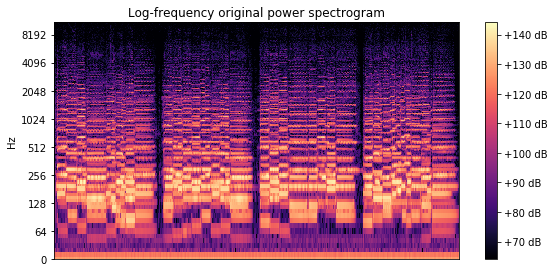

In [5]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
librosa.display.specshow(inp, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency original power spectrogram')

Text(0.5, 1.0, 'Log-frequency reconstructed power spectrogram')

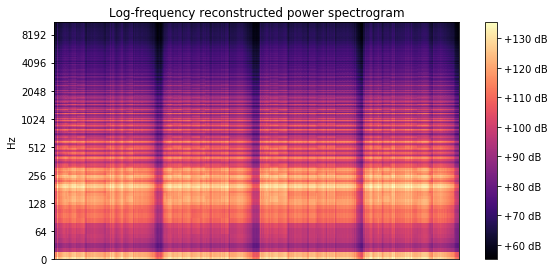

In [6]:
alpha=np.dot(D,A)
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
librosa.display.specshow(alpha, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency reconstructed power spectrogram')

Text(0.5, 1.0, 'Basis Vector Spectogram')

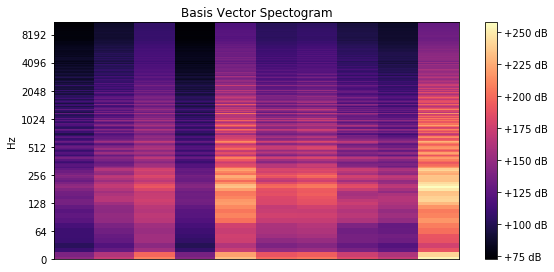

In [7]:
alpha=np.dot(D,A)
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Basis Vector Spectogram')